# Lab | Comparing regression models
Load the cleaned categorical and numerical dataframes that you saved at the end of Monday's labs.

#### Instructions
Concatenate Numerical and Categorical dataframes into one dataframe called data. Split into X=features y=target.

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

***********************************************
#### Hint for Categorical Variables
You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

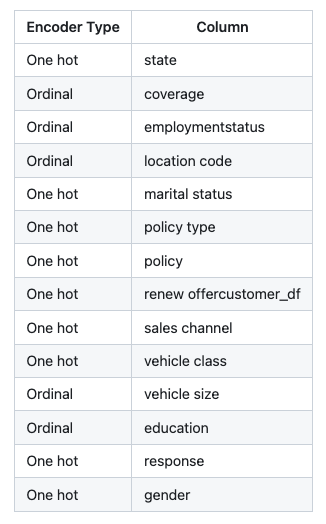

#### Dummy code

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" values are to be represented in the same order.

******************************************************
6. Try a simple linear regression with all the data to see whether we are getting good results.

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

8. Use the function to check LinearRegressor and KNeighborsRegressor.

9. You can check also the MLPRegressor for this task!

10. Check and discuss the results.

# Data Preparation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [2]:
# Load the clean categorical and numeric DataFrames

categorical_df = pd.read_csv('categorical.csv')
numerical_df = pd.read_csv('numerical.csv')

## Concatenate Numerical and Categorical dataframes into one dataframe called data

In [3]:
# Checking that they have same index

if numerical_df.index.equals(categorical_df.index):
    print("The DataFrames have the same index.")
else:
    print("The DataFrames have different indexes.")

The DataFrames have the same index.


In [4]:
# Concatenate numerical and categorical df
data = pd.concat([numerical_df, categorical_df], axis=1)

In [5]:
data

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,California,No,...,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,14,28,0,1,379.200000,California,Yes,...,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,790.784983,California,No,...,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,691.200000,California,No,...,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [6]:
data.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
state                             object
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
location_code                     object
marital_status                    object
policy_type                       object
policy                             int64
renew_offer_type                   int64
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
dtype: object

"policy" and "renew_offer_type" are categorical variables interpreted as integer type so I have to change their type and include them with the categorical variables.

In [8]:
categorical_df['policy'] = categorical_df['policy'].astype('object')
categorical_df['renew_offer_type'] = categorical_df['renew_offer_type'].astype('object')

In [9]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [10]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
data = pd.concat([numerical_df, categorical_df], axis=1)

In [12]:
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


In [13]:
data.shape

(9134, 22)

In [14]:
data.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
state                             object
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
location_code                     object
marital_status                    object
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
dtype: object

## Split into X=features y=target

The target is: "total_claim_amount"

In [15]:
X = data.drop('total_claim_amount', axis=1)
y = data['total_claim_amount']

In [16]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state,response,coverage,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,Washington,No,Basic,...,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,Arizona,No,Extended,...,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,Nevada,No,Premium,...,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,California,No,Basic,...,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,Washington,No,Basic,...,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,California,No,Basic,...,Employed,M,Urban,Married,Personal Auto,1,2,Web,Four-Door Car,Medsize
9130,3096.511217,21604,79,14,28,0,1,California,Yes,Extended,...,Employed,F,Suburban,Divorced,Corporate Auto,3,1,Branch,Four-Door Car,Medsize
9131,8163.890428,0,85,9,37,3,2,California,No,Extended,...,Unemployed,M,Suburban,Single,Corporate Auto,2,1,Branch,Four-Door Car,Medsize
9132,7524.442436,21941,96,34,3,0,3,California,No,Extended,...,Employed,M,Suburban,Married,Personal Auto,2,3,Branch,Four-Door Car,Large


In [17]:
y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: total_claim_amount, Length: 9134, dtype: float64

## 2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [18]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Separate X_train and X_test into numeric and categorical
X_train_num = X_train.select_dtypes(include=[np.number])
X_test_num = X_test.select_dtypes(include=[np.number])
X_train_cat = X_train.select_dtypes(exclude=[np.number])
X_test_cat = X_test.select_dtypes(exclude=[np.number])

In [20]:
X_train_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
5123,4768.955924,51144,61,28,32,1,9
7738,2827.559570,0,79,30,25,0,1
214,2912.892035,81097,74,7,67,0,1
8580,5138.244998,72264,64,2,66,0,9
7857,2610.369217,54737,66,3,86,0,1
...,...,...,...,...,...,...,...
5734,7334.328083,87957,61,31,63,0,2
5191,5498.940679,22520,73,17,64,0,3
5390,8992.779137,0,129,13,4,0,7
860,14635.451580,0,139,5,56,0,2


In [21]:
X_test_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
708,4222.631209,74585,106,1,49,0,1
47,5514.344018,23218,71,7,10,0,4
3995,3808.122147,94903,94,3,38,0,1
1513,7914.823110,77153,99,3,27,1,5
3686,7931.722181,23769,69,18,14,0,2
...,...,...,...,...,...,...,...
4855,8688.754812,59098,110,31,73,0,3
1880,7623.580733,69900,64,23,68,0,2
8472,4660.399573,89834,116,24,11,0,1
5967,2089.337182,0,63,30,6,1,1


In [22]:
X_train_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
5123,Washington,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
7738,Oregon,No,Extended,College,Unemployed,F,Suburban,Single,Special Auto,2,3,Branch,Four-Door Car,Medsize
214,Arizona,No,Basic,College,Employed,M,Suburban,Divorced,Personal Auto,1,4,Agent,Four-Door Car,Small
8580,California,No,Basic,Bachelor,Employed,F,Urban,Married,Corporate Auto,3,3,Web,Four-Door Car,Medsize
7857,Washington,No,Basic,Bachelor,Employed,F,Suburban,Single,Personal Auto,3,3,Web,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,California,No,Basic,College,Employed,F,Suburban,Divorced,Personal Auto,3,3,Agent,Four-Door Car,Small
5191,California,Yes,Basic,College,Other,M,Suburban,Married,Personal Auto,3,1,Branch,Four-Door Car,Medsize
5390,California,No,Extended,High School or Below,Unemployed,F,Suburban,Single,Personal Auto,1,1,Call Center,SUV,Medsize
860,Arizona,Yes,Extended,Bachelor,Unemployed,F,Suburban,Divorced,Personal Auto,3,1,Call Center,SUV,Medsize


In [23]:
X_test_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
708,California,No,Basic,High School or Below,Employed,M,Rural,Married,Personal Auto,3,2,Agent,SUV,Medsize
47,Oregon,No,Basic,High School or Below,Employed,F,Suburban,Single,Personal Auto,2,4,Agent,Two-Door Car,Medsize
3995,Oregon,Yes,Extended,College,Employed,F,Suburban,Married,Personal Auto,3,2,Agent,Two-Door Car,Small
1513,California,No,Extended,College,Employed,F,Urban,Married,Personal Auto,3,1,Branch,Four-Door Car,Medsize
3686,Washington,No,Basic,High School or Below,Other,F,Suburban,Divorced,Personal Auto,2,1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,Oregon,No,Basic,College,Employed,F,Suburban,Divorced,Personal Auto,3,2,Agent,SUV,Medsize
1880,Arizona,No,Basic,High School or Below,Employed,M,Rural,Married,Personal Auto,2,4,Branch,Two-Door Car,Large
8472,Oregon,No,Basic,Bachelor,Employed,F,Rural,Married,Corporate Auto,3,1,Branch,SUV,Medsize
5967,Washington,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,2,1,Agent,Four-Door Car,Small


# Processing Data

## 3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [24]:
# Scaling numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [25]:
X_train_num_scaled

array([[-0.4791244 ,  0.45134656, -0.93902843, ..., -0.5704001 ,
         0.68021817,  2.50411078],
       [-0.76499347, -1.24271378, -0.41995333, ..., -0.82059859,
        -0.41699025, -0.82816703],
       [-0.75242833,  1.44349011, -0.56414086, ...,  0.68059231,
        -0.41699025, -0.82816703],
       ...,
       [ 0.14283022, -1.24271378,  1.02192195, ..., -1.57119404,
        -0.41699025,  1.67104132],
       [ 0.97370926, -1.24271378,  1.31029701, ...,  0.28742327,
        -0.41699025, -0.41163231],
       [-0.68811765,  1.34395445, -0.2757658 , ..., -1.24951027,
        -0.41699025, -0.82816703]])

In [26]:
X_test_num_scaled

array([[-0.55957028,  1.22779088,  0.35865932, ...,  0.03722478,
        -0.41699025, -0.82816703],
       [-0.36936659, -0.47365596, -0.65065337, ..., -1.35673819,
        -0.41699025,  0.42143715],
       [-0.62060641,  1.900791  ,  0.01260926, ..., -0.35594426,
        -0.41699025, -0.82816703],
       ...,
       [-0.49510923,  1.73288877,  0.64703438, ..., -1.32099555,
        -0.41699025, -0.82816703],
       [-0.87369613, -1.24271378, -0.88135342, ..., -1.49970876,
         0.68021817, -0.82816703],
       [ 1.19715306, -1.24271378,  0.44517184, ...,  0.64484967,
        -0.41699025, -0.41163231]])

## 4. Encode the categorical variables X_train_cat and X_test_cat 

In [27]:
# Encoding categorical features using OneHotEncoder and OrdinalEncoder
categorical_features_one_hot = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'response', 'gender']
categorical_features_ordinal = ['coverage', 'employmentstatus', 'location_code', 'vehicle_size', 'education']

In [28]:
# Preprocessor for categorical
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(), categorical_features_one_hot),
    ('ordinal', OrdinalEncoder(), categorical_features_ordinal)
])

In [29]:
# Adjust and transform categorical features
X_train_cat_processed = preprocessor.fit_transform(X_train_cat)
X_test_cat_processed = preprocessor.transform(X_test_cat)

## 5. Check and make sure that every column is numerical

In [30]:
X_train_cat_processed

array([[0., 0., 0., ..., 2., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 2., 1.],
       ...,
       [0., 1., 0., ..., 1., 1., 2.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 2., 1., 0.]])

In [31]:
X_test_cat_processed

array([[0., 1., 0., ..., 0., 1., 2.],
       [0., 0., 0., ..., 1., 1., 2.],
       [0., 0., 0., ..., 1., 2., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 2., 2.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [32]:
# Combine numerical and categorical processes to obtain the final set for training and testing
X_train_processed = np.concatenate((X_train_num_scaled, X_train_cat_processed), axis=1)
X_test_processed = np.concatenate((X_test_num_scaled, X_test_cat_processed), axis=1)

In [33]:
X_train_processed

array([[-0.4791244 ,  0.45134656, -0.93902843, ...,  2.        ,
         1.        ,  0.        ],
       [-0.76499347, -1.24271378, -0.41995333, ...,  1.        ,
         1.        ,  1.        ],
       [-0.75242833,  1.44349011, -0.56414086, ...,  1.        ,
         2.        ,  1.        ],
       ...,
       [ 0.14283022, -1.24271378,  1.02192195, ...,  1.        ,
         1.        ,  2.        ],
       [ 0.97370926, -1.24271378,  1.31029701, ...,  1.        ,
         1.        ,  0.        ],
       [-0.68811765,  1.34395445, -0.2757658 , ...,  2.        ,
         1.        ,  0.        ]])

In [34]:
X_test_processed

array([[-0.55957028,  1.22779088,  0.35865932, ...,  0.        ,
         1.        ,  2.        ],
       [-0.36936659, -0.47365596, -0.65065337, ...,  1.        ,
         1.        ,  2.        ],
       [-0.62060641,  1.900791  ,  0.01260926, ...,  1.        ,
         2.        ,  1.        ],
       ...,
       [-0.49510923,  1.73288877,  0.64703438, ...,  0.        ,
         1.        ,  0.        ],
       [-0.87369613, -1.24271378, -0.88135342, ...,  1.        ,
         2.        ,  2.        ],
       [ 1.19715306, -1.24271378,  0.44517184, ...,  1.        ,
         0.        ,  1.        ]])

# Training and Evaluation of Models

## 6. Try a simple linear regression with all the data to see whether we are getting good results.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error  # Import the necessary functions

In [36]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model to the training set
linear_model.fit(X_train_processed, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test_processed)

# Evaluate the model using R2 and MSE (Mean Squared Error)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R2 score: {r2}')
print(f'MSE: {mse}')

R2 score: 0.6108173169340727
MSE: 30944.320179666556


The linear regression model demonstrates moderate performance, with an R2 value of 61.08%, suggesting that it can explain a significant portion of the data's variability. However, the MSE value indicates that there are still prediction errors, and the model is not perfect in its estimations. The full interpretation of the model's performance depends on the context and specific requirements of the problem.

## 7. Define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [37]:
# Function to train and evaluate models

"""
    Train and evaluate machine learning models with a training and test set.

    Parameters:
    -----------
    models : list
        A list of machine learning models to train and evaluate.
    X_train : numpy.ndarray
        Training feature set.
    y_train : numpy.ndarray
        Training labels.
    X_test : numpy.ndarray
        Test feature set.
    y_test : numpy.ndarray
        Test labels.

"""

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    for model in models:
        # Train the model with the training set
        model.fit(X_train, y_train)
        # Make predictions on the test set
        predictions = model.predict(X_test)
        # Print the model name and its R2 score on the test set
        print(f'{model.__class__.__name__}: R2 score on test set is {r2_score(y_test, predictions)}')

## 8 & 9. Use the function to check LinearRegressor, KNeighborsRegressor and MLPRegressor.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [39]:
# List of models to evaluate
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=5),
    MLPRegressor(hidden_layer_sizes=(100,), random_state=42)
]

In [40]:
# Train and evaluate the models
train_and_evaluate(models, X_train_processed, y_train, X_test_processed, y_test)

LinearRegression: R2 score on test set is 0.6108173169340727
KNeighborsRegressor: R2 score on test set is 0.6179613267062909
MLPRegressor: R2 score on test set is 0.794028586074582


## 10. Check and discuss the results.

The MLPRegressor model has the best performance among the three evaluated models, with the highest R2 score on the test set, indicating that it is the model that fits the test data the best. The other two models also have decent performance but are not as effective as the MLPRegressor in this particular scenario.